In [20]:
#We can go into our root file and see what Trees are availiable
%matplotlib inline
import sys, os
if __package__ is None:
    import sys, os
    sys.path.append(os.path.realpath("/data/shared/Software/"))
import numpy as np

from keras.utils.visualize_util import plot
from IPython.display import Image, display

from CMS_SURF_2016.utils.preprocessing import *
from CMS_SURF_2016.utils.metrics import plot_history, print_accuracy_m
from CMS_SURF_2016.utils.callbacks import OverfitStopping, SmartCheckpoint
from CMS_SURF_2016.utils.archiving import *

from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Reshape, Activation, Dropout, Convolution2D, merge, Input, Flatten
from keras.callbacks import EarlyStopping



using gpu0
using theano


In [21]:
preprocessed_dir = "/data/shared/Delphes/preprocessed/"

Train on 2400 samples, validate on 600 samples
Epoch 1/5
2400/2400 [==============================] - 5s - loss: 1.7908 - acc: 0.6283 - val_loss: 0.6913 - val_acc: 0.6650
Epoch 2/5
2400/2400 [==============================] - 4s - loss: 0.6895 - acc: 0.6669 - val_loss: 0.6875 - val_acc: 0.6683
Epoch 3/5
2400/2400 [==============================] - 4s - loss: 0.6862 - acc: 0.6683 - val_loss: 0.6859 - val_acc: 0.6650
Epoch 4/5
2400/2400 [==============================] - 3s - loss: 0.6927 - acc: 0.6678 - val_loss: 0.6819 - val_acc: 0.6650
Epoch 5/5
2400/2400 [==============================] - 4s - loss: 0.6787 - acc: 0.6674 - val_loss: 0.6779 - val_acc: 0.6656


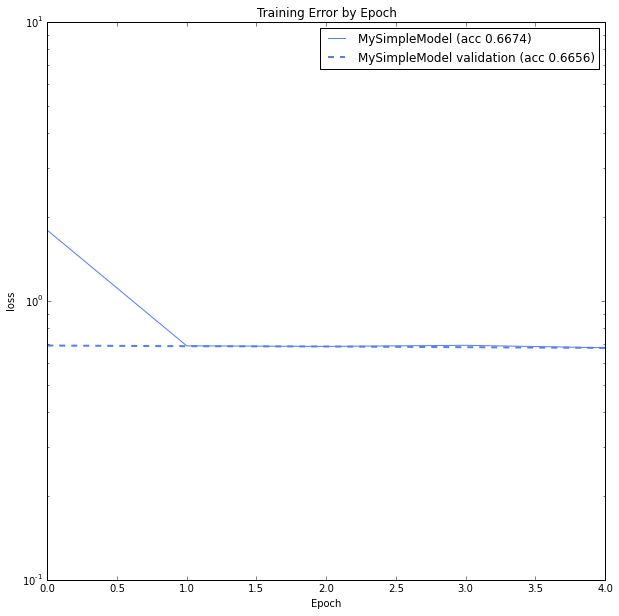

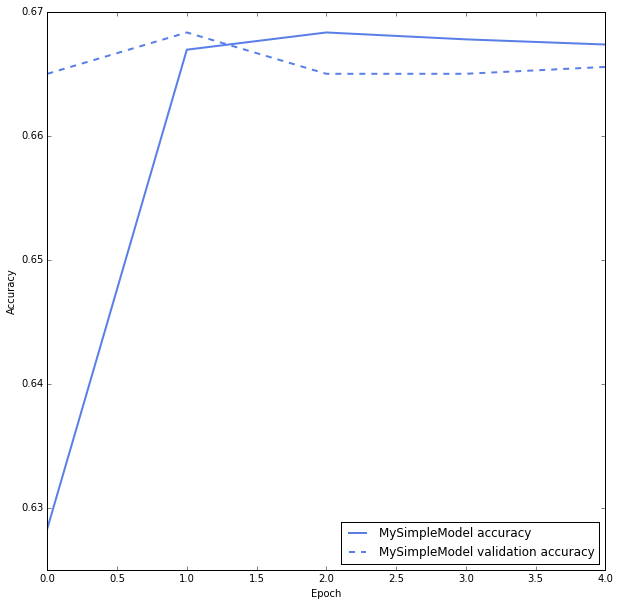

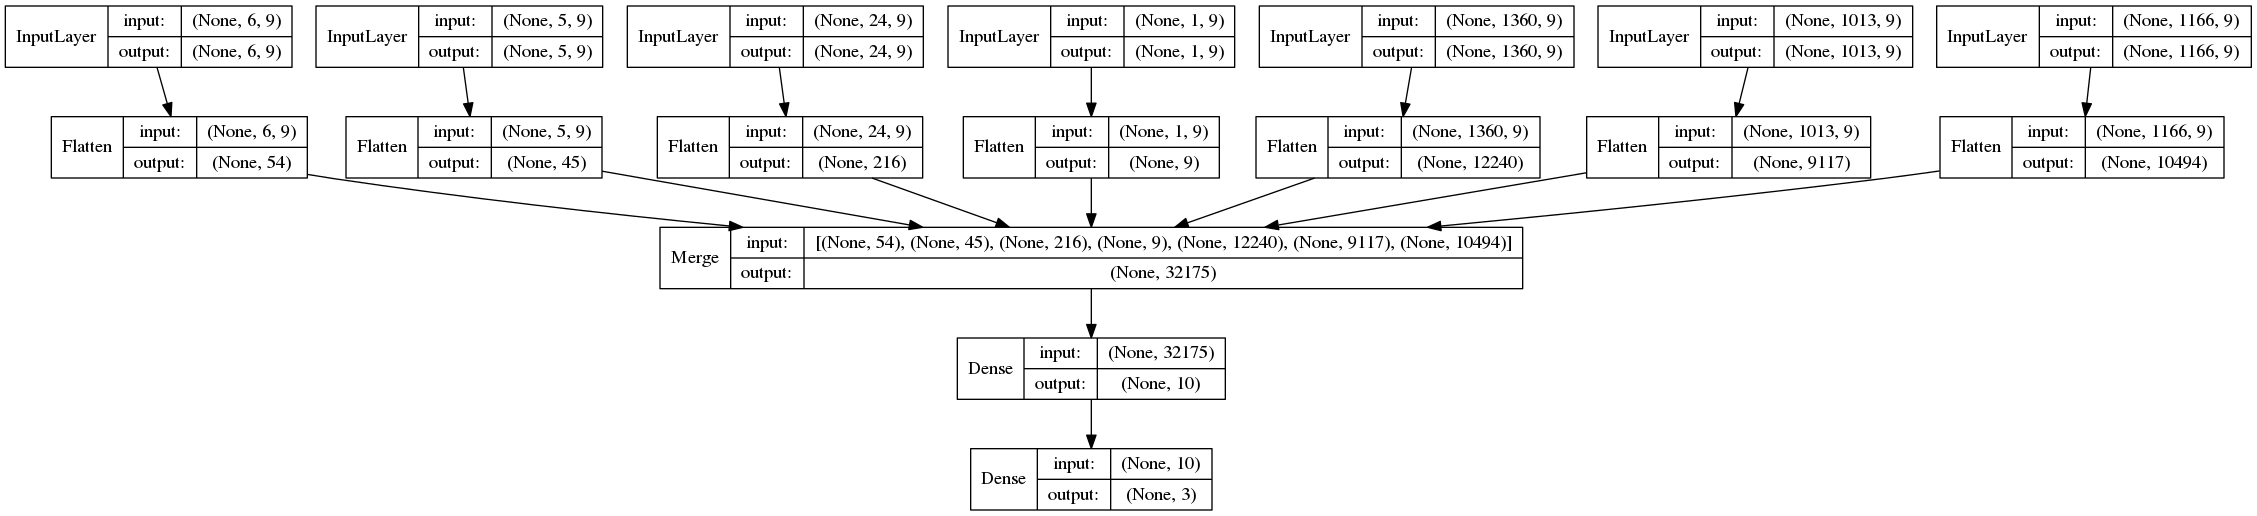

In [22]:
#Get the training data
X_train, Y_train =  XY_from_pickle(preprocessed_dir+"data_0k")

def genModel(depth, width):
    inputs = [None] * len(X_train)
    fist_layer = [None] * len(X_train)
    #Build Inputs
    for i in range(len(X_train)):
        shape = X_train[i].shape
        max_size = shape[1]
        inp = Input(shape=(max_size, shape[2]), name="input_" + str(i))
        inputs[i] = inp
        fist_layer[i] = Flatten(name="flatten_" + str(i))(inp)
    #Merge inputs
    merged = merge(fist_layer, mode='concat', name="merge")
    a = merged
    v = [width] * depth
    for j in range(len(v)):
        a = Dense(v[j], activation='relu', name="dense_2_"+str(j))(a)
    second_dense = a 
    
    #Create dense sigmoid layer for classification
    dense_out = Dense(Y_train[0].shape[1], activation='sigmoid', name='main_output')(second_dense)
    dense = Model(input=inputs, output=dense_out, name="dense")
    return dense



#Generate the model from our function above
model = genModel(1,10)
model.compile(loss='binary_crossentropy',
          optimizer='rmsprop',
          metrics=['accuracy']
              )

#VERY FEW EPOCHS FOR ILLUSTRATIVE REASONS
epochs = 5
batch_size = 100

history = model.fit(X_train, Y_train, batch_size=batch_size,
                nb_epoch=epochs,
                validation_split=.2,
                #YOU SHOULD REALLY USE CALLBACKS AND INCREASE THE # of EPOCHS TO LIKE 100
                callbacks=[])

plot_history([("MySimpleModel", history)])
dot = plot(model, to_file="MySimpleModel.png", show_shapes=True, show_layer_names=False)
display(Image("MySimpleModel.png"))